In [1]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
X = pd.read_parquet('/home/fearjm/scratch/ncbi_remap/rnaseq_correlations.parquet').values
names = pd.read_parquet('/home/fearjm/scratch/ncbi_remap/rnaseq_correlations.parquet').index

In [3]:
d = 1 - X[np.triu_indices(X.shape[0], 1)]

In [4]:
L = linkage(d, method='average')

In [5]:
thresh = 0.7 * np.max(L[:, 2])

In [6]:
c = fcluster(L, thresh, 'distance')

In [7]:
tree = dendrogram(L, color_threshold=thresh, no_plot=True)
leaves = tree['leaves']

In [8]:
metadata = pd.read_csv('../output/geo-wf/rnaseq_metadata.tsv', sep='\t', index_col=0).reindex(names[leaves])
testis = (metadata.tissue == 'testis').fillna(False).astype(int).values
ovary = (metadata.tissue == 'ovary').fillna(False).astype(int).values
head = (metadata.tissue == 'head').fillna(False).astype(int).values
s2 =  metadata['cell type'].str.contains("S2").fillna(False).astype(int).values

In [11]:
cmap = mpl.colors.ListedColormap(['w', 'red'])

def plot(ax, target, title):
    #ax.axis('off')
    ax.imshow(np.vstack([target]*2).T, cmap=cmap, aspect='auto')
    ax.set(yticks=[], xticks=[])
    ax.set_title(title, fontsize=12, rotation=90, va='bottom', ha='left')
    return ax

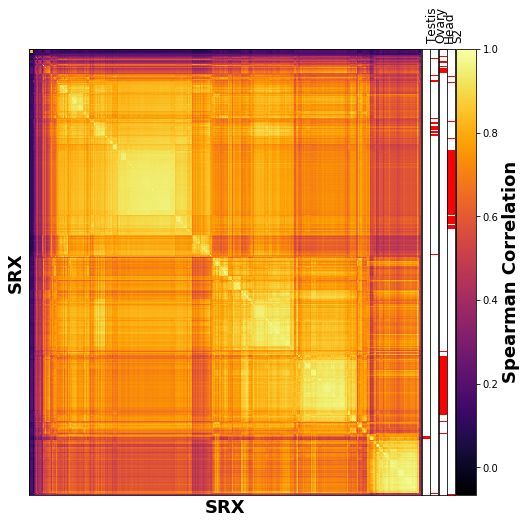

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(8, 8.2), gridspec_kw=dict(width_ratios=[1, .02, .02, .02, .02, .05], wspace=0.01, hspace=0))

cax = ax1.imshow(X[leaves, :][:, leaves], cmap='inferno', aspect='auto')
ax1.set(xticks=[], yticks=[])
ax1.set_xlabel('SRX', fontsize=18, fontweight='bold')
ax1.set_ylabel('SRX', fontsize=18, fontweight='bold')

plot(ax2, testis, 'Testis')
plot(ax3, ovary, 'Ovary')
plot(ax4, head, 'Head')
plot(ax5, s2, 'S2')

cbar = plt.colorbar(cax, cax=ax6)
ax6.set_ylabel('Spearman Correlation', fontsize=18, fontweight='bold')
fig.savefig('../output/notebook/2019-02-24_correlation_heatmap.svg', bbox_inches='tight')